In [1]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import seaborn as sns

In [2]:
stock_news = 'https://finviz.com/quote.ashx?t='

In [3]:
stocks = ['AAPL']

In [4]:
news_tables = {}
for stock in stocks:
    url = stock_news + stock
    req = Request(url = url, headers = {'user-agent':'my-app'})
    
    response = urlopen(req)
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id ='news-table')
    news_tables[stock] = news_table

In [5]:
print(url)

https://finviz.com/quote.ashx?t=AAPL


In [6]:
parsed_data = []
for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        title = row.a.text if row.a else 'N/A'
        
        date_data = row.td.text.split(' ')
        date_time = [value.strip() for value in date_data if value.strip()]

        
        print(date_time)
        if len(date_time) == 1:
            time = date_time[0]
    
        else:
            date = date_time[0]
            time = date_time[1]
        
        parsed_data.append([stock,date,time,title])

['Today', '06:59PM']
['06:28PM']
['06:10PM']
['06:07PM']
['05:59PM']
['05:59PM']
['05:59PM']
['05:58PM']
['05:57PM']
['05:47PM']
['05:41PM']
['05:27PM']
['05:22PM']
['05:19PM']
['05:02PM']
['04:44PM']
['04:36PM']
['04:36PM']
['04:18PM']
['04:17PM']
['04:10PM']
['04:03PM']
['04:03PM']
['03:58PM']
['03:39PM']
['03:35PM']
['03:29PM']
['03:28PM']
['03:24PM']
['03:00PM']
['02:58PM']
['02:58PM']
['02:58PM']
['02:58PM']
['02:58PM']
['02:53PM']
['02:47PM']
['02:46PM']
['02:41PM']
['02:40PM']
['02:37PM']
['02:36PM']
['02:36PM']
['02:36PM']
['02:36PM']
['02:36PM']
['02:32PM']
['02:28PM']
['02:28PM']
['02:28PM']
['02:24PM']
['02:02PM']
['01:58PM']
['01:53PM']
['01:51PM']
['01:46PM']
['01:45PM']
['01:44PM']
['01:31PM']
['01:30PM']
['01:30PM']
['01:06PM']
['12:57PM']
['12:50PM']
['12:47PM']
['12:30PM']
['12:28PM']
['12:26PM']
['11:50AM']
['11:41AM']
['11:41AM']
['11:27AM']
['11:07AM']
['10:57AM']
['10:39AM']
['10:24AM']
['10:13AM']
['10:06AM']
['09:50AM']
['09:50AM']
['09:46AM']
['09:40AM']
['09:18

In [7]:
dataset = pd.DataFrame(parsed_data, columns= ['Stock','Date','Time','Title'])

In [8]:
# The dataset consists of N/A value for the finviz elite magazine. Dropping that row with N/A value

dataset.replace('N/A', pd.NA, inplace=True)


In [9]:
news = dataset.dropna()

In [10]:
vader = SentimentIntensityAnalyzer()

In [11]:
sent = lambda Title: vader.polarity_scores(Title)['compound']
news['compound']= news['Title'].apply(sent)

/var/folders/tc/_cj9s22x7y3fw4d6pb25bttr0000gn/T/ipykernel_17130/3648463720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['compound']= news['Title'].apply(sent)


In [12]:
news.head()

,Stock,Date,Time,Title,compound
0,AAPL,Today,06:59PM,Apple Intelligence's Siri feature will change ...,0.0000
1,AAPL,Today,06:28PM,Apple's iPhone 16 line should convince a lot o...,0.5994
2,AAPL,Today,06:10PM,Apple Unveils an AI iPhone,0.0000
3,AAPL,Today,06:07PM,Apple says AirPods Pro 2 can be used as 'clini...,0.0000
4,AAPL,Today,05:59PM,"Don't Overlook Apple's AirPods, Especially the...",0.0000


In [13]:
def parse_custom_datetime(dt_str):
    if 'Today' in dt_str:
        dt_str = dt_str.replace('Today', pd.Timestamp.today().strftime('%Y-%m-%d'))
    return parse(dt_str)

news['Date'] = news['Date'].apply(parse_custom_datetime)

/var/folders/tc/_cj9s22x7y3fw4d6pb25bttr0000gn/T/ipykernel_17130/1948562188.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Date'] = news['Date'].apply(parse_custom_datetime)


<Axes: xlabel='Time', ylabel='compound'>

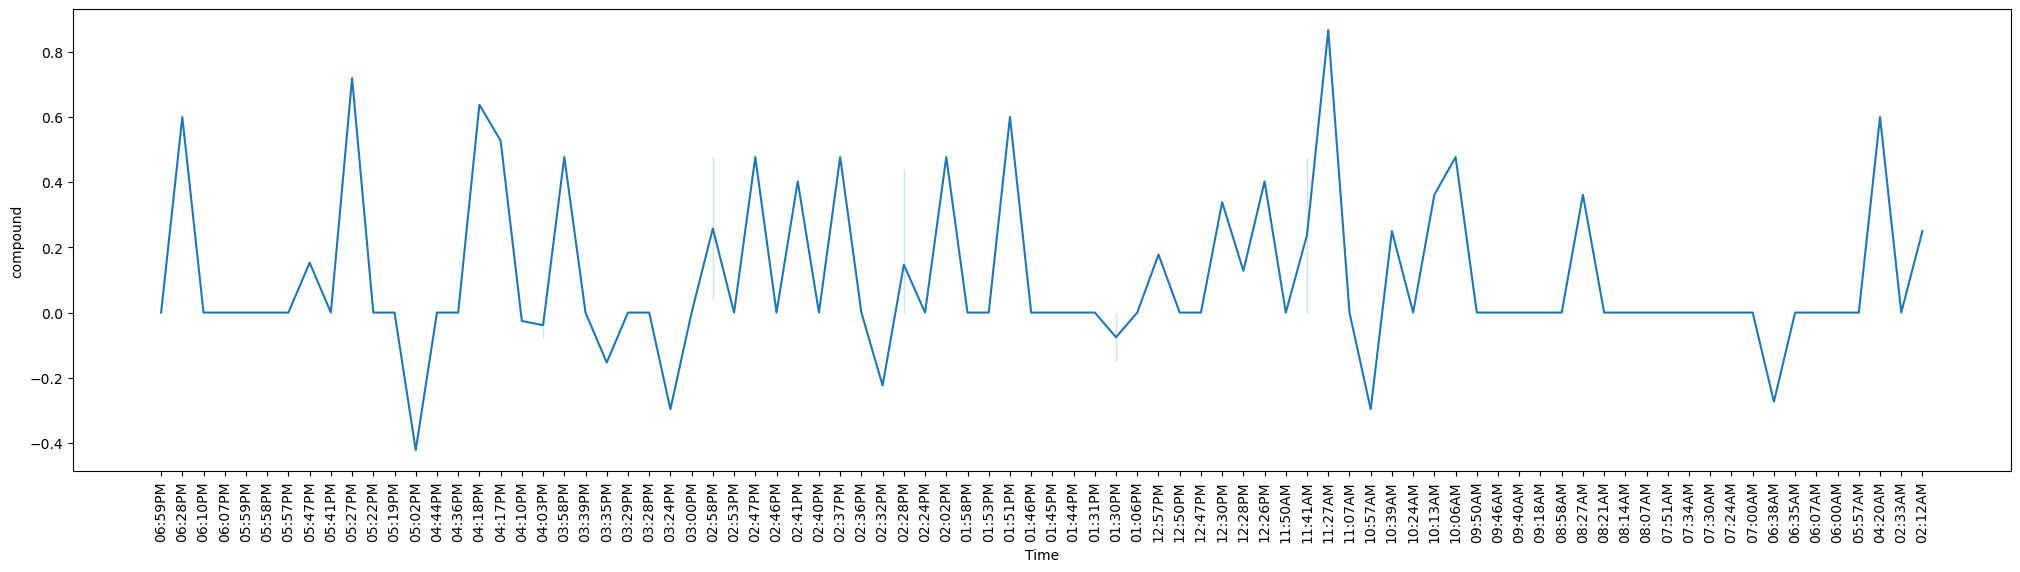

In [14]:
plt.figure(figsize=(25,6))
plt.xticks(rotation='vertical')
sns.lineplot(x=news['Time'], y = news['compound'], data = news)

In [15]:
# Convert using 'mixed' format handling
news['Time'] = pd.to_datetime(news['Time'], format='mixed', errors='coerce')


/var/folders/tc/_cj9s22x7y3fw4d6pb25bttr0000gn/T/ipykernel_17130/2567406644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Time'] = pd.to_datetime(news['Time'], format='mixed', errors='coerce')


In [16]:
mean_dataset = news.groupby(['Stock','Time'])['compound'].mean()

In [17]:
# Assuming 'compound' is already a single column, transpose the DataFrame directly
mean_dataset = mean_dataset.transpose()

print(mean_dataset.count())

84
